In [1]:
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt


In [29]:
def pt_above(pt, line_pts):
# 1 if above, 0 or -1 if otherwise
    x = pt[0]
    y = pt[1]

    lmpt = line_pts[0]
    rmpt = line_pts[1]

    array = np.array([
        [lmpt[0] - x, lmpt[1] - y],
        [rmpt[0] - x, rmpt[1] - y],
        ])
    det = np.linalg.det(array)
    sign = np.sign(det)
    return sign

In [3]:
def ccwArrange(pts):
    #find the dissection line
    lm_pt, lm_x, rm_pt, rm_x = None,None,None,None

    for pt in pts:
        x = pt[0]
        if lm_x == None or x < lm_x:
            lm_x = x
            lm_pt = pt
        if rm_x == None or x > rm_x:
            rm_x = x
            rm_pt = pt

    top, bot = [],[]
    for pt in pts:
        gp = pt_above(pt, [lm_pt,rm_pt])
        if gp < 1:
                bot.append(pt)
        elif gp == 1:
                top.append(pt)

    bot.sort(key=itemgetter(0))
    top.sort(key=itemgetter(0), reverse=True)

    return bot+top
    

    

In [4]:
def coorToSeparateList(ptsList):
    x = []
    y = []
    for pt in ptsList:
        x.append(pt[0])
        y.append(pt[1])
    return x, y

In [5]:
def midpointTransform(xprev, yprev):
    xcurr = []
    ycurr = []
    size = len(xprev)-1
    for n in range(size):
        xmid = (xprev[n]+xprev[n+1])/2
        xcurr.append(xmid)
        ymid = (yprev[n]+yprev[n+1])/2
        ycurr.append(ymid)
    xcurr.append((xprev[0]+xprev[-1])/2)
    ycurr.append((yprev[0]+yprev[-1])/2)
    return xcurr, ycurr

In [23]:
def main(pts, numIter, is_ccw=True, set_x_min = 0, set_x_max = 10,set_y_min = 0, set_y_max = 10, show_last = False):
#   convert to float
    pts = [[float(pt[0]),float(pt[1])] for pt in pts]
#  arrange into a ccw non-intersecting polygon. 
    if not is_ccw:
        pts = ccwArrange(pts)
    
    numVertex = len(pts)
    xprev, yprev = coorToSeparateList(pts)
    
    fig, ax = plt.subplots(sharex=True, sharey=True)
    ax.set_xlim(set_x_min,set_x_max)
    ax.set_ylim(set_y_min,set_y_max)
    if (numIter==0) or (not show_last):
        ax.plot(xprev, yprev, c='b', alpha=0.8)
        ax.plot([xprev[0], xprev[-1]], [yprev[0], yprev[-1]], c='b', alpha=0.8)
   
    for i in range(numIter):
        xcurr, ycurr = midpointTransform(xprev, yprev)
        xprev, yprev = xcurr, ycurr
        if not show_last:
            ax.plot(xcurr, ycurr, c='b', alpha=0.8)
            ax.plot([xcurr[0], xcurr[-1]], [ycurr[0], ycurr[-1]], c='b', alpha=0.8)
    if (show_last) and (numIter!=0):
        ax.plot(xcurr, ycurr, c='b', alpha=0.8)
        ax.plot([xcurr[0], xcurr[-1]], [ycurr[0], ycurr[-1]], c='b', alpha=0.8)
                 
    plt.show()



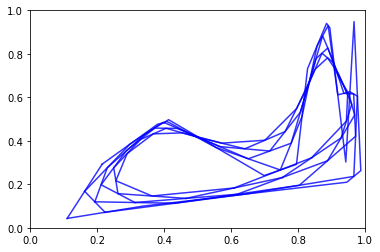

In [38]:
# [x,y] coordinates in a list
# if the input points are not in ccw order, set is_ccw=False, 
# to show only the result of the last iteration, set show_last=True
# example, vert = [[3,2],[1,1],[4,3],[2,5],[2,2]]
vert = np.random.rand(15,2).tolist()
main(vert,5, is_ccw = False, set_x_max = 1, set_y_max = 1, show_last = False)